In [1]:
import torch
from torch import nn, optim

from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt
import numpy as np
import time, os

In [2]:
args = {
    'epoch_num': 5,
    'lr': 1e-3,
    'weight_decay': 8e-4,
    'batch_size': 20
}

In [3]:
data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

In [4]:
train_set = datasets.CIFAR10('./', train=True, transform=data_transform, download=False)
test_set = datasets.CIFAR10('./', train=False, transform=data_transform, download=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

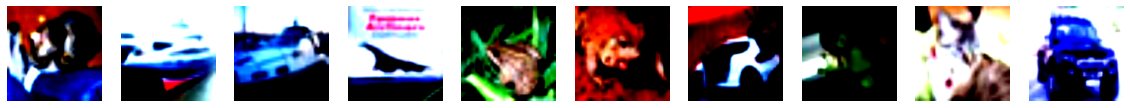

In [5]:
fig, axs = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    data, label = test_set[i]
    axs[i].imshow(data.permute(1,2,0))
    axs[i].axis('off')

In [6]:
train_loader = DataLoader(train_set, batch_size=args['batch_size'], shuffle=True)
test_loader = DataLoader(test_set, batch_size=args['batch_size'], shuffle=True)

In [7]:
net = models.vgg16_bn(pretrained=True)

In [8]:
net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [9]:
list(net.named_children())

[('features',
  Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, k

In [10]:
novo_classifier = list(net.children())[-1][:-3]
novo_classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
)

In [11]:
net.classifier = nn.Sequential(* novo_classifier)

In [12]:
net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [13]:
def extrai_caracteristicas(net, loader):

    # Evaluation mode
    net.eval()

    feat_list, rotulo_list = [], []
    with torch.no_grad(): 
        for k, batch in enumerate(loader):
            for i in range(50):
                print('\r--{0}/{1}--'.format(i, 50, end='', flush=True))

                dado, rotulo = batch

                # Extração
                caracteristica = net(dado)
                feat_list.append(caracteristica.detach().cpu().numpy())
                rotulo_list.append(rotulo.detach().cpu().numpy())
            
            break

    feat_list    = np.asarray(feat_list)
    feat_list    = np.reshape(feat_list, (feat_list.shape[0]*feat_list.shape[1], feat_list.shape[2]))

    rotulo_list  = np.asarray(rotulo_list).ravel()

    return feat_list, rotulo_list

In [14]:
print('Load train')
train_X, train_Y = extrai_caracteristicas(net, train_loader)
print('\nLoad test')
test_X,  test_Y  = extrai_caracteristicas(net, test_loader)

Load train
--0/50--
--1/50--
--2/50--
--3/50--
--4/50--
--5/50--
--6/50--
--7/50--
--8/50--
--9/50--
--10/50--
--11/50--
--12/50--
--13/50--
--14/50--
--15/50--
--16/50--
--17/50--
--18/50--
--19/50--
--20/50--
--21/50--
--22/50--
--23/50--
--24/50--
--25/50--
--26/50--
--27/50--
--28/50--
--29/50--
--30/50--
--31/50--
--32/50--
--33/50--
--34/50--
--35/50--
--36/50--
--37/50--
--38/50--
--39/50--
--40/50--
--41/50--
--42/50--
--43/50--
--44/50--
--45/50--
--46/50--
--47/50--
--48/50--
--49/50--

Load test
--0/50--
--1/50--
--2/50--
--3/50--
--4/50--
--5/50--
--6/50--
--7/50--
--8/50--
--9/50--
--10/50--
--11/50--
--12/50--
--13/50--
--14/50--
--15/50--
--16/50--
--17/50--
--18/50--
--19/50--
--20/50--
--21/50--
--22/50--
--23/50--
--24/50--
--25/50--
--26/50--
--27/50--
--28/50--
--29/50--
--30/50--
--31/50--
--32/50--
--33/50--
--34/50--
--35/50--
--36/50--
--37/50--
--38/50--
--39/50--
--40/50--
--41/50--
--42/50--
--43/50--
--44/50--
--45/50--
--46/50--
--47/50--
--48/50--
--49/50-

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(train_X, train_Y)

pred = clf.predict(test_X)
print('{:.2f}%'.format(accuracy_score(test_Y, pred)*100))

65.00%


C:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [17]:
net = models.vgg16_bn(pretrained=True)
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [18]:
in_features = list(net.children())[-1][-1].in_features

new_classifier =list(net.classifier.children())[:-1]
new_classifier.append(nn.Linear(in_features, 10))

net.classifier = nn.Sequential(*new_classifier)
print(net.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)


In [19]:
optimizer = optim.Adam([
            {'params': net.features.parameters(), 'lr':args['lr']*0.2, 'weight_decay': args['weight_decay']*0.2},
            {'params': net.classifier.parameters(), 'lr': args['lr'], 'weight_decay': args['weight_decay']}
        ], lr=0)

In [20]:
criterion = nn.CrossEntropyLoss()

In [21]:
def train(train_loader, net, epoch):

    # Training mode
    net.train()

    start = time.time()

    epoch_loss  = []
    pred_list, rotulo_list = [], []
    for k, batch in enumerate(train_loader):
        for i in range(50):
            print('\r--{0}/{1}--'.format(i, 50), end='', flush=True)
            dado, rotulo = batch

            # Forward
            ypred = net(dado)
            # print(ypred.size(), rotulo.size())
            loss = criterion(ypred, rotulo)
            # print(loss.size())
            epoch_loss.append(loss.cpu().data)

            _, pred = torch.max(ypred, axis=1)
            pred_list.append(pred.cpu().numpy())
            rotulo_list.append(rotulo.cpu().numpy())

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        break

    epoch_loss = np.asarray(epoch_loss)
    pred_list  = np.asarray(pred_list).ravel()
    rotulo_list  = np.asarray(rotulo_list).ravel()

    acc = accuracy_score(pred_list, rotulo_list)

    end = time.time()
    print('\n#################### Train ####################')
    print('Epoch %d, Loss: %.4f +/- %.4f, Acc: %.2f, Time: %.2f' % (epoch, epoch_loss.mean(), epoch_loss.std(), acc*100, end-start))

    return epoch_loss.mean()


In [23]:
def validate(test_loader, net, epoch):

    # Evaluation mode
    net.eval()

    start = time.time()

    epoch_loss  = []
    pred_list, rotulo_list = [], []
    with torch.no_grad(): 
        for k, batch in enumerate(test_loader):
        
            for i in range(50):

                print('\r--{0}/{1}--'.format(i, 50), end='', flush=True)
                dado, rotulo = batch

                # Forward
                ypred = net(dado)
                loss = criterion(ypred, rotulo)
                epoch_loss.append(loss.cpu().data)

                _, pred = torch.max(ypred, axis=1)
                pred_list.append(pred.cpu().numpy())
                rotulo_list.append(rotulo.cpu().numpy())

            break

    epoch_loss = np.asarray(epoch_loss)
    pred_list  = np.asarray(pred_list).ravel()
    rotulo_list  = np.asarray(rotulo_list).ravel()

    acc = accuracy_score(pred_list, rotulo_list)

    end = time.time()
    print('\n********** Validate **********')
    print('Epoch %d, Loss: %.4f +/- %.4f, Acc: %.2f, Time: %.2f\n' % (epoch, epoch_loss.mean(), epoch_loss.std(), acc*100, end-start))

    return epoch_loss.mean()


In [24]:
train_losses, test_losses = [], []
for epoch in range(args['epoch_num']):
  
    # Train
    train_losses.append(train(train_loader, net, epoch))

    # Validate
    test_losses.append(validate(test_loader, net, epoch))

--49/50--
#################### Train ####################
Epoch 0, Loss: 0.2308 +/- 0.7065, Acc: 96.20, Time: 2378.66
--49/50--
********** Validate **********
Epoch 0, Loss: 7.3908 +/- 0.0000, Acc: 30.00, Time: 619.26

--8/50--

KeyboardInterrupt: 